# Phase 1: Exploratory Data Analysis (EDA)

## 1: Import Libraries

In [194]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## 2: Loading Dataset

In [195]:
# uploaded = files.upload()

In [196]:
df = pd.read_csv('hotel_bookings.csv')

## 3: Take a look at the dataset

In [197]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 4: Check for missing values

In [199]:
print(df.isnull().sum())

# Found nulls in multiple columns(children, country, agent, company).

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

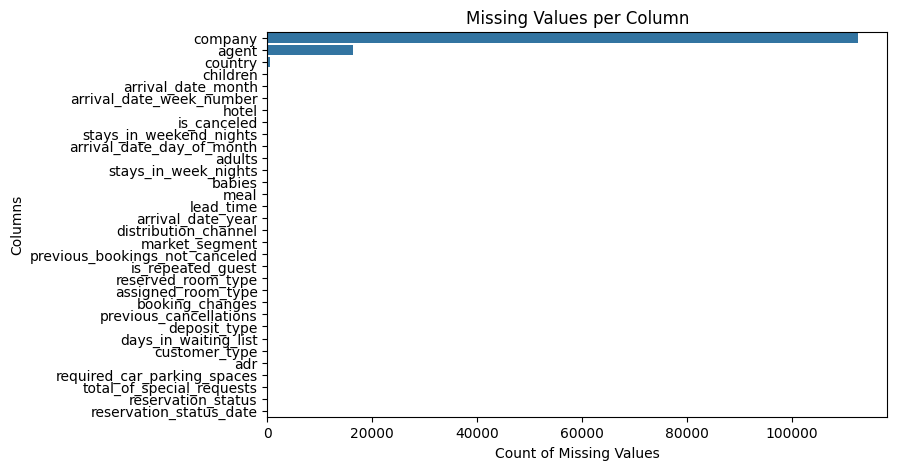

In [200]:
# Sort columns descendingly by missing values count.
missing_counts = df.isnull().sum().sort_values(ascending = False)
# Plot a bar chart
plt.figure(figsize=(8, 5))
# Making the bars horizontal to be able to read columns' name.
sns.barplot(x=missing_counts.values, y=missing_counts.index)
plt.title("Missing Values per Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Columns")
plt.show()
# Since children column only has 4 missing values, its bar is too small to be visible.

## 5: Check for duplicates

In [201]:
# Get duplicate rows count
df.duplicated().sum()

np.int64(31994)

In [202]:
# Display duplicate rows
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


## 6: Detect Outliers

In [203]:
# Get key numeric columns
numeric_cols = ["adr", "lead_time"]

# Function to calculate number of outliers for a column using IQR
def get_outliers_count(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Print column name and its outlier's count
for col in numeric_cols:
    outliers, lower_bound, upper_bound = get_outliers_count(df, col)
    print(f"Column: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    print(f"lower_bound: {lower_bound}")
    print(f"upper_bound: {upper_bound}\n")


Column: adr
Number of outliers: 3793
lower_bound: -15.774999999999991
upper_bound: 211.065

Column: lead_time
Number of outliers: 3005
lower_bound: -195.0
upper_bound: 373.0



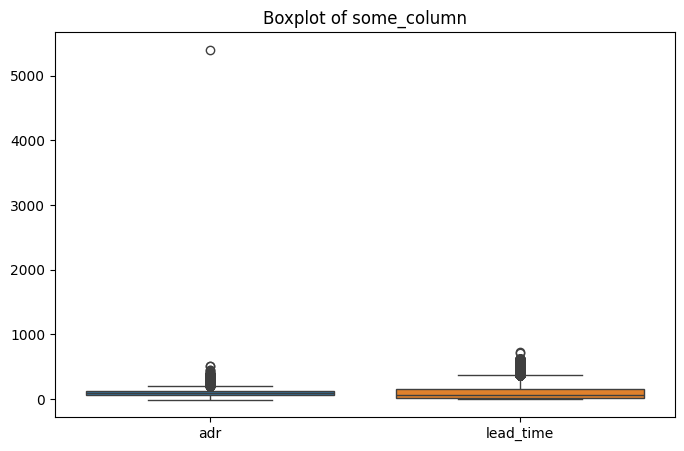

In [204]:
# Plot the two columns to look at the outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["adr", "lead_time"]])
plt.title("Boxplot of some_column")
plt.show()

## 7: Correlation with target `is_canceled`

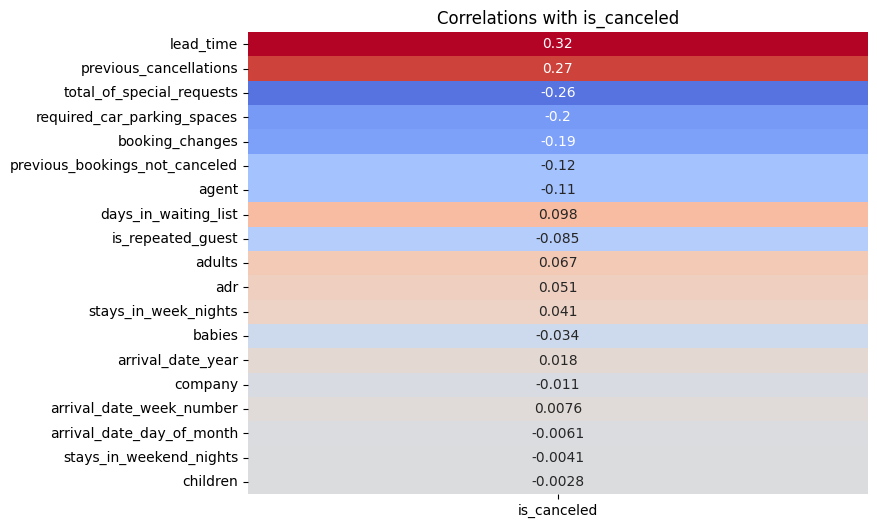

,is_canceled
lead_time,0.316635
previous_cancellations,0.270233
total_of_special_requests,-0.258520
required_car_parking_spaces,-0.197397
booking_changes,-0.185107
previous_bookings_not_canceled,-0.115354
agent,-0.114970
days_in_waiting_list,0.098237
is_repeated_guest,-0.084793
adults,0.067027


In [205]:
def plot_target_correlation():
    numeric_df = df.select_dtypes(include=['number'])
    corr = numeric_df.corr(method = 'spearman')['is_canceled'].drop('is_canceled')
    corr = corr.sort_values(key=abs, ascending=False)

    corr = corr.head(20)

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        corr.to_frame(),
        annot=True, cmap="coolwarm", center=0, cbar=False
    )
    plt.title(f"Correlations with is_canceled")
    plt.show()

    return corr

plot_target_correlation()

## 8: Chi-Square test

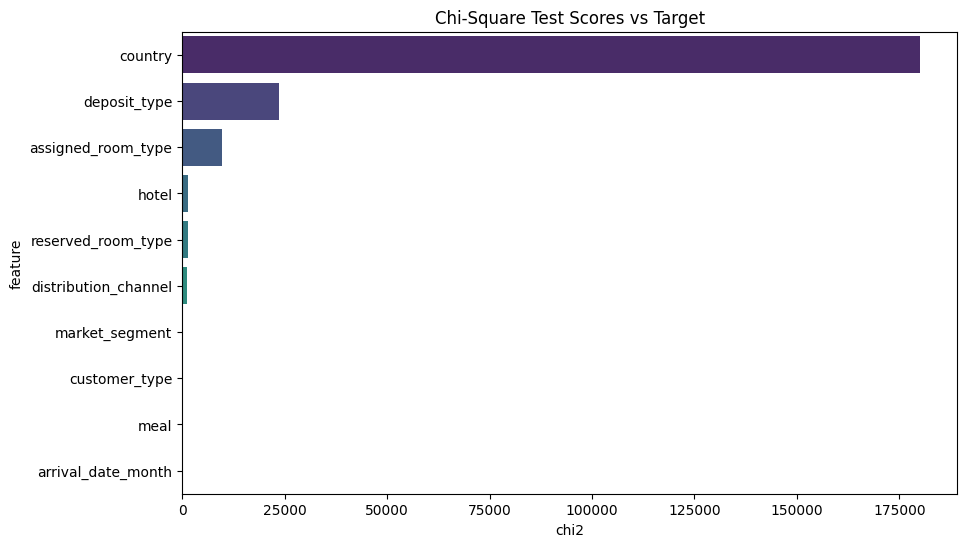

In [206]:
# Remove data leakage columns first
df.drop(columns=['reservation_status', 'reservation_status_date'], inplace=True)

def chi_square_plot():
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.drop('is_canceled', errors='ignore')
    df_encoded = df.copy()
    for col in cat_cols:
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

    chi_scores, p_values = chi2(df_encoded[cat_cols], df_encoded['is_canceled'])
    results = pd.DataFrame({'feature': cat_cols, 'chi2': chi_scores, 'p': p_values}).sort_values('chi2', ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(data=results, x='chi2', y='feature', palette="viridis")
    plt.title("Chi-Square Test Scores vs Target")
    plt.show()
chi_square_plot()

## 9: Document Findings

### Columns With Missing Data:
- `children`: 4 missing values  
- `country`: 488 missing values  
- `agent`: 16340 missing values  
- `company`: 112593 missing values

We will need to handle these column's missing values.



### Key Numeric Columns Outliers:
- `adr` 3793 outliers (with one value being extremely larger than the rest)
- `lead_time` 3005 outliers

We will need to handle these column's outliers.


### Duplicated Rows:
 found 31994 duplicated rows that need to be removed.

### Feature Analysis:
#### Chi-Square Test (Categorical Features):
- `country`: strongest influence on cancellations
- `deposit_type`: significant influence
- `assigned_room_type`: moderate influence
- `other categorical features`: weak influence

#### Correlation with is_canceled (Numeric Features):
- `lead_time`: 0.32 (positive correlation)
- `previous_cancellations`: 0.27 (positive correlation)
- `total_of_special_requests`: -0.26 (negative correlation)
- `required_car_parking_spaces`: -0.20 (negative correlation)
- `booking_changes`: -0.19 (negative correlation)
- `other numeric features`: weak or negligible correlation


# Phase 2: Data Cleaning

## 1: Handle Missing Values

In [207]:
df['children'].fillna(df['children'].mean(), inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

# df['children'].fillna(df['children'].median(), inplace=True)
# df['country'].fillna('Unknown', inplace=True)
# df['agent'].fillna('None', inplace=True)
# df['company'].fillna('None', inplace=True)

In [208]:
# Make sure there is no more missing values
print(df.isnull().sum().sum())

0


## 2: Remove Duplicates

In [209]:
# resetting index
df = df.drop_duplicates().reset_index(drop=True)

In [210]:
# Make sure there is no more duplicated rows
df.duplicated().sum()

np.int64(0)

## 3: Handle Outliers

In [211]:
# Clip adr and lead_time at the 1st and 99th percentile.
lower = df['adr'].quantile(0.01)
upper = df['adr'].quantile(0.99)
df['adr'] = df['adr'].clip(lower, upper)

lower = df['lead_time'].quantile(0.01)
upper = df['lead_time'].quantile(0.99)
df['lead_time'] = df['lead_time'].clip(lower, upper)

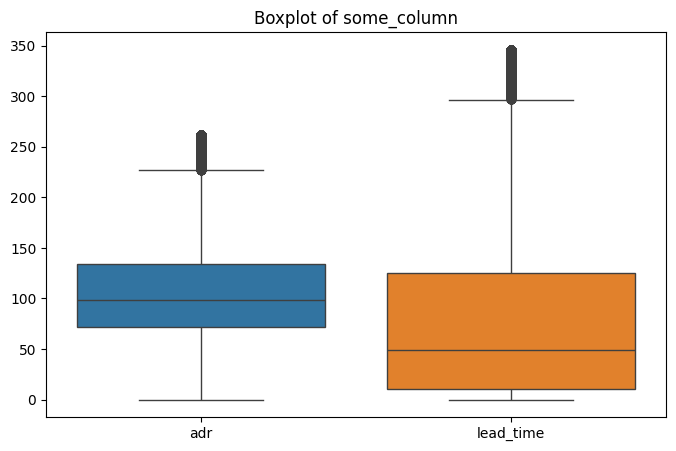

In [212]:
# Plotting the two columns again to look at the change
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["adr", "lead_time"]])
plt.title("Boxplot of some_column")
plt.show()

## 4: Fix DataTypes

In [213]:
# Convert all objects to strings then change reservation_status_date to date time
df = df.astype({col: "string" for col in df.select_dtypes(include="object").columns})

# Convert children, agent and company to integer since they cant be decimal
df["children"] = df["children"].astype(int)
df["agent"] = df["agent"].astype(int)
df["company"] = df["company"].astype(int)


In [214]:
# Check on datatypes now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87119 entries, 0 to 87118
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87119 non-null  string 
 1   is_canceled                     87119 non-null  int64  
 2   lead_time                       87119 non-null  int64  
 3   arrival_date_year               87119 non-null  int64  
 4   arrival_date_month              87119 non-null  string 
 5   arrival_date_week_number        87119 non-null  int64  
 6   arrival_date_day_of_month       87119 non-null  int64  
 7   stays_in_weekend_nights         87119 non-null  int64  
 8   stays_in_week_nights            87119 non-null  int64  
 9   adults                          87119 non-null  int64  
 10  children                        87119 non-null  int64  
 11  babies                          87119 non-null  int64  
 12  meal                            

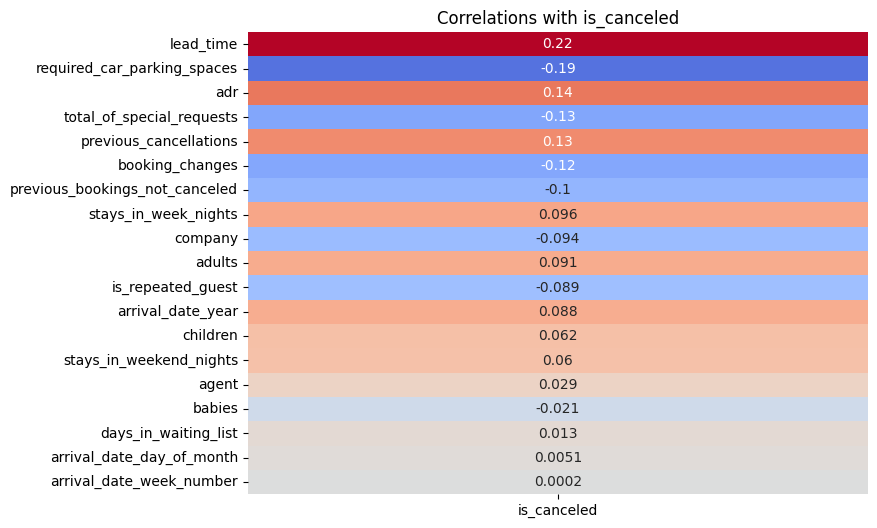

,is_canceled
lead_time,0.224260
required_car_parking_spaces,-0.185403
adr,0.144333
total_of_special_requests,-0.125442
previous_cancellations,0.125255
booking_changes,-0.123559
previous_bookings_not_canceled,-0.102983
stays_in_week_nights,0.096294
company,-0.093923
adults,0.091059


In [215]:
# take another look at the correlation after data cleaning
plot_target_correlation()

# Phase 3: Feature Engineering

## 1: New Features


In [216]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_family'] = (df['children'] + df['babies']) > 0

## 2: Encode Features

### Find unique value count

In [217]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

hotel: 2
is_canceled: 2
lead_time: 347
arrival_date_year: 3
arrival_date_month: 12
arrival_date_week_number: 53
arrival_date_day_of_month: 31
stays_in_weekend_nights: 17
stays_in_week_nights: 35
adults: 14
children: 5
babies: 5
meal: 5
country: 177
market_segment: 8
distribution_channel: 5
is_repeated_guest: 2
previous_cancellations: 15
previous_bookings_not_canceled: 73
reserved_room_type: 10
assigned_room_type: 12
booking_changes: 21
deposit_type: 3
agent: 334
company: 353
days_in_waiting_list: 128
customer_type: 4
adr: 8527
required_car_parking_spaces: 5
total_of_special_requests: 6
total_guests: 15
total_nights: 45
is_family: 2


### Look for any format inconsistency

In [218]:
string_cols = df.select_dtypes(include='string').columns

for col in string_cols:
    print(f"Column '{col}':")
    print(df[col].unique())
    print("-" * 40)

Column 'hotel':
<StringArray>
['Resort Hotel', 'City Hotel']
Length: 2, dtype: string
----------------------------------------
Column 'arrival_date_month':
<StringArray>
[     'July',    'August', 'September',   'October',  'November',  'December',
   'January',  'February',     'March',     'April',       'May',      'June']
Length: 12, dtype: string
----------------------------------------
Column 'meal':
<StringArray>
['BB', 'FB', 'HB', 'SC', 'Undefined']
Length: 5, dtype: string
----------------------------------------
Column 'country':
<StringArray>
['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN', 'ARG',
 ...
 'ATA', 'GTM', 'ASM', 'MRT', 'NCL', 'KIR', 'SDN', 'ATF', 'SLE', 'LAO']
Length: 177, dtype: string
----------------------------------------
Column 'market_segment':
<StringArray>
[       'Direct',     'Corporate',     'Online TA', 'Offline TA/TO',
 'Complementary',        'Groups',     'Undefined',      'Aviation']
Length: 8, dtype: string
-----------------------

In [219]:
# See all country unique values
print(df['country'].unique().tolist())

['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', 'KNA', 'ETH', 'IRQ', 'HND', 'RWA', 'KHM', 'MCO', 'BGD', 'IMN', 'TJK', 'NIC', 'BEN', 'VGB', 'TZA', 'GAB', 'GHA', 'TMP',

### One Hot Encode low cardinalty columns

In [220]:
# removing features with low importance first
df.drop(columns=['arrival_date_month', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'arrival_date_month'], inplace=True)

df = pd.get_dummies(df, columns=[
    'meal',
    'market_segment',
    'assigned_room_type',
])

# Convert hotel to flag
df['hotel'] = df['hotel'].map({'Resort Hotel': 1, 'City Hotel': 0})

### group rare countries together in `country` column

In [221]:
# Count frequency of each country
counts = df['country'].value_counts()

# Map the frequencies to a new column
df['country_freq'] = df['country'].map(counts)

# Get a look at the frequency values to decide threshold
print(df['country_freq'].unique())

<IntegerArray>
[27724, 10414,  1871,  7242,  3007,  8830,   457,   513,    18,   203,   765,
  5382,  2080,  1570,  1091,   116,  3054,  1910,   384,   559,   835,   378,
    79,   136,  1991,   422,    55,     1,   260,    44,    11,   143,   814,
    74,   232,    62,    51,    54,    65,   942,    24,    73,   212,    78,
   341,   402,     2,    23,     4,    82,   119,   202,    48,    37,     6,
    91,    80,    19,     7,    15,    30,     8,     5,    45,    69,    16,
    12,    21,    13,    25,    29,    32,    63,    40,     9,   182,    10,
    68,     3,    34,    14,    31,    26,    17,    43]
Length: 85, dtype: Int64


In [222]:
# Decided on using threshold = 100

df['country'] = df['country'].apply(
    lambda x: x if counts[x] >= 100 else 'Other'
)

print(df['country'].value_counts())

country
PRT      27724
GBR      10414
FRA       8830
ESP       7242
DEU       5382
ITA       3054
IRL       3007
Other     2336
BEL       2080
BRA       1991
NLD       1910
USA       1871
CHE       1570
CN        1091
AUT        942
SWE        835
CHN        814
POL        765
RUS        559
NOR        513
ROU        457
FIN        422
ISR        402
DNK        384
AUS        378
AGO        341
LUX        260
MAR        232
TUR        212
ARG        203
HUN        202
JPN        182
IND        143
CZE        136
KOR        119
GRC        116
Name: count, dtype: int64


### Frequency Encode `Country` column

In [223]:
# Count frequency of each country
counts = df['country'].value_counts() / len(df)

# Map the frequencies to a new column
df['country_freq'] = df['country'].map(counts)

### Convert bools to 0s and 1s

In [224]:
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})

## 3: Take a final look at the data after cleaning

In [225]:
df.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,country_freq
count,87119.000000,87119.000000,87119.000000,87119.000000,87119.000000,87119.000000,87119.000000,87119.000000,87119.000000,87119.000000,...,87119.000000,87119.000000,87119.000000,87119.000000,87119.000000,87119.000000,87119.000000,87119.000000,87119.000000,87119.000000
mean,0.388733,0.272799,79.126643,2016.210505,26.838141,15.814070,1.005372,2.625604,1.875951,0.138879,...,0.256982,0.082450,0.041598,0.028639,0.008104,0.004098,0.003168,0.000011,0.000069,0.142836
std,0.487465,0.445401,83.597850,0.686026,13.673484,8.834754,1.031570,2.051729,0.626778,0.456248,...,0.436972,0.275051,0.199671,0.166791,0.089656,0.063883,0.056197,0.003388,0.008299,0.124689
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001332
25%,0.000000,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034516
50%,0.000000,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101356
75%,1.000000,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.318231
max,1.000000,1.000000,346.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.318231


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87119 entries, 0 to 87118
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87119 non-null  int64  
 1   is_canceled                     87119 non-null  int64  
 2   lead_time                       87119 non-null  int64  
 3   arrival_date_year               87119 non-null  int64  
 4   arrival_date_week_number        87119 non-null  int64  
 5   arrival_date_day_of_month       87119 non-null  int64  
 6   stays_in_weekend_nights         87119 non-null  int64  
 7   stays_in_week_nights            87119 non-null  int64  
 8   adults                          87119 non-null  int64  
 9   children                        87119 non-null  int64  
 10  babies                          87119 non-null  int64  
 11  country                         87119 non-null  object 
 12  is_repeated_guest               

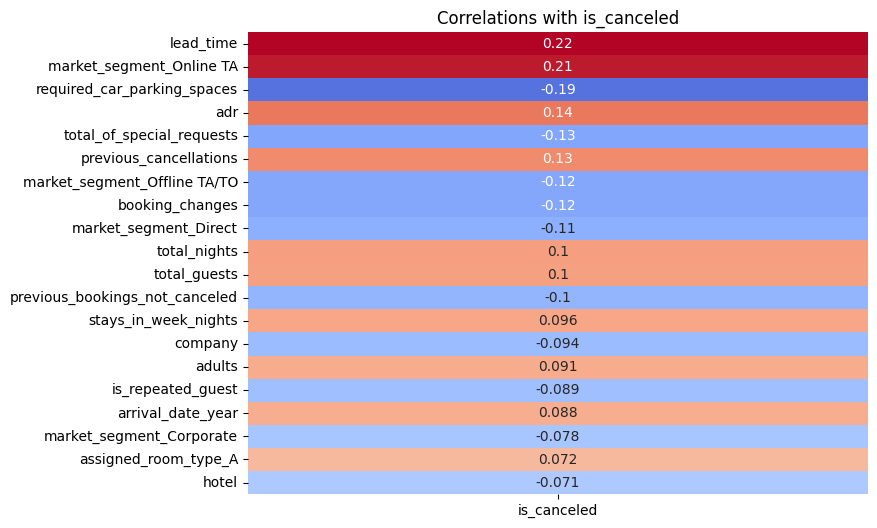

In [227]:
corr = plot_target_correlation()

## 4: Feature Selection

In [228]:
# Select features with corr >= 0.1 only
selected_features = corr[abs(corr) >= 0.1].index.tolist()
selected_features.append('is_canceled')
df = df[selected_features]

# Download cleaned dataset to check it
df.to_csv('updated_dataset.csv', index=False)

## 5: Split data to train/test sets

In [229]:
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
# Standardize sets
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)